In [20]:
from classes.data_handler import DataHandler
from classes.siamese_nn import SiameseNN
from classes.nn_network import NNNetwork
from classes.base_model import BaseModel
from classes.transfer_learning import TransferLearning
from keras.optimizers import Adam

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Loading

In [2]:
image_gen_params = {
'rotation_range' : 30,
'width_shift_range' : 0.3,
'height_shift_range' : 0.3,
'shear_range' : 0.3,
'horizontal_flip' : True,
'vertical_flip' : True,
'fill_mode': 'nearest',
'zoom_range' : 0.2
 }


dh = DataHandler()
dh.load_data()
dh.augment_data(use_train = True, c_04567 = True, N = 100, visualize = False, **image_gen_params)
#dh.augment_data(use_train = True, c_04567 = False, N = 2, visualize = False, **image_gen_params)

# Base model trained on 04567

In [3]:
bm_04567 = BaseModel(dh, c_04567 = True)

0


In [4]:
# hyper param tuning
best, best_score, trials = bm_04567.tune_hyper_params(max_evals = 5)
best, best_score, trials

Test accuracy of model 0/5 is 49.46%:
Test accuracy of model 1/5 is 51.34%:
Test accuracy of model 2/5 is 59.00%:
Test accuracy of model 3/5 is 57.18%:
Test accuracy of model 4/5 is 59.06%:


({'dropout0': 0.26483877802197003,
  'dropout1': 0.36053969281774373,
  'fc_size0': 1,
  'filter_size0': 2,
  'filter_size1': 2,
  'kernel_size0': 0,
  'kernel_size1': 1,
  'num_layers': 0},
 0.59060000000000001,
 <hyperopt.base.Trials at 0x3e14a50f98>)

In [5]:
# hyper params with accuracy of 63.20% based on max_evals = 40
best_bm_04567_params =  {'dropout0': 0.25282483292854196,
                  'dropout1': 0.6226846699645904,
                  'fc_size0': 128,
                  'filter_size0': 64,
                  'filter_size1': 64,
                  'kernel_size0': 5,
                  'kernel_size1': 3,
                  'num_layers': {'layers': 'two'},
                  'activation': 'relu',
                  'optimizer' : 'adam',
                  'nb_epochs': 40
                  }
bm_04567_best_model = bm_04567.train_model(h_params = best_bm_04567_params, hyper_param_tuning = False )['model']
bm_04567_best_model.save('bm_04567_best_model.h5')

Test accuracy of model 56.86%:


*Accuracy of classifying the test set at level 1: 56.86%
*Accuracy of classifying the test set at level 2: 79.38%
*Accuracy of classifying the test set at level 3: 93.24%
Normalized confusion matrix
[[ 0.7   0.05  0.01  0.23  0.01]
 [ 0.53  0.34  0.    0.13  0.  ]
 [ 0.01  0.    0.68  0.08  0.23]
 [ 0.59  0.09  0.    0.31  0.01]
 [ 0.    0.    0.18  0.    0.81]]


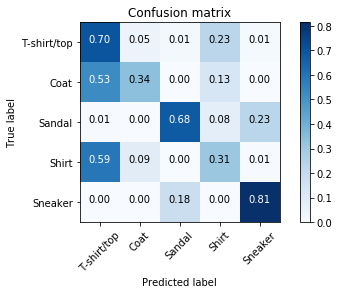

In [6]:
bm_04567.compute_accuracy(bm_04567_best_model, max_acc_level = 3)
bm_04567.plot_confusion_matrix(bm_04567_best_model, normalize = True)

# Base model trained on 12389

In [9]:
bm_12389 = BaseModel(dh, c_04567 = False)

In [10]:
# hyper param tuning
best, best_score, trials = bm_12389.tune_hyper_params(max_evals = 2)
best, best_score, trials

Test accuracy of model 0/2 is 98.52%:
Test accuracy of model 1/2 is 98.86%:


({'dropout0': 0.31016854046336645,
  'dropout1': 0.2840030501638232,
  'fc_size0': 2,
  'filter_size0': 2,
  'filter_size1': 2,
  'kernel_size0': 1,
  'kernel_size1': 0,
  'num_layers': 0},
 0.98860000000000003,
 <hyperopt.base.Trials at 0x3e14a50b38>)

In [11]:
# model of about 99% accuracy of max_eval = 2
best_bm_12389_params =  {'dropout0': 0.614347535183095,
                  'dropout1': 0.45211595712010083,
                  'fc_size0': 64,
                  'filter_size0': 64,
                  'filter_size1': 64,
                  'kernel_size0': 5,
                  'kernel_size1': 3,
                  'num_layers': {'layers': 'two'},
                  'activation': 'relu',
                  'optimizer' : 'adam',
                  'nb_epochs': 1
                  }
bm_12389_best_model = bm_12389.train_model(h_params = best_bm_12389_params, hyper_param_tuning = False)['model']
bm_12389_best_model.save('bm_12389_best_model')

Test accuracy of model 96.44%:


*Accuracy of classifying the test set at level 1: 96.44%
*Accuracy of classifying the test set at level 2: 99.46%
*Accuracy of classifying the test set at level 3: 99.92%
Normalized confusion matrix
[[ 0.96  0.    0.04  0.    0.  ]
 [ 0.    0.97  0.02  0.    0.  ]
 [ 0.01  0.06  0.93  0.    0.  ]
 [ 0.    0.03  0.01  0.96  0.  ]
 [ 0.    0.    0.    0.    1.  ]]


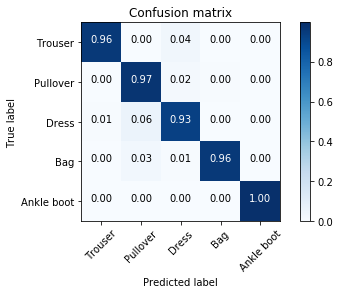

In [12]:
bm_12389.compute_accuracy(bm_12389_best_model, max_acc_level = 3)
bm_12389.plot_confusion_matrix(bm_12389_best_model, normalize = True)

# Transfer learing pretrained on 12389

In [23]:
tl = TransferLearning(dh, c_04567 = True)
tl.set_base_model(bm_12389_best_model)

In [24]:
# hyper param tuning
best, best_score, trials = tl.tune_hyper_params(max_evals = 3)
best, best_score, trials

D:\Google Drive\TUe\PDEng\Modules\Data Mining\CodeExampleAndFashionDataset\classes\transfer_learning.py:49: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=Tensor("so...)`
  return model


Test accuracy of model 0/3 is 56.46%:
Test accuracy of model 1/3 is 58.40%:
Test accuracy of model 2/3 is 56.78%:


({'dropout0': 0.34234407068812306,
  'fc_size0': 2,
  'lr': 1,
  'train_conv0': 1,
  'train_conv1': 0},
 0.58399999999999996,
 <hyperopt.base.Trials at 0x3e37e2c898>)

In [27]:
# hyper params with accuracy of 60.49% with max_eval = ??
best_tl_params =  {'dropout0': 0.5928175094135784,
                  'fc_size0': 128,
                  'train_conv0': False,
                  'train_conv1': True,                  
                  'activation': 'relu',
                  'optimizer' : Adam,
                  'lr':0.001,
                  'nb_epochs': 40
                  }

tl_best_model = tl.train_model(h_params = best_tl_params)['model']
tl_best_model.save('tl_best_model.h5')

D:\Google Drive\TUe\PDEng\Modules\Data Mining\CodeExampleAndFashionDataset\classes\transfer_learning.py:49: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=Tensor("so...)`
  model = Model(input=self.base_model.input, output=predictions)


Test accuracy of model 3/3 is 55.70%:


*Accuracy of classifying the test set at level 1: 55.70%
*Accuracy of classifying the test set at level 2: 79.36%
*Accuracy of classifying the test set at level 3: 88.46%
Normalized confusion matrix
[[ 0.27  0.57  0.01  0.12  0.03]
 [ 0.1   0.8   0.    0.1   0.  ]
 [ 0.    0.01  0.59  0.1   0.3 ]
 [ 0.16  0.62  0.    0.21  0.01]
 [ 0.    0.    0.09  0.    0.91]]


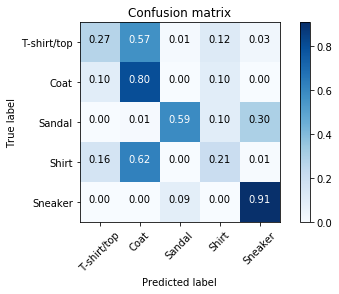

In [28]:
tl.compute_accuracy(tl_best_model, max_acc_level = 3)
tl.plot_confusion_matrix(tl_best_model, normalize = True)

# Siamese NN

In [29]:
sh = SiameseNN(dh)
# hyper param tuning
best, best_score, trials = sh.tune_hyper_params(max_evals = 2)
best, best_score, trials

Number of training pairs is 693 
Number of val pairs is 297 


D:\Google Drive\TUe\PDEng\Modules\Data Mining\CodeExampleAndFashionDataset\classes\siamese_nn.py:128: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("de...)`
  return Model(input=[input_a, input_b], output=flattened_weighted_distance)
D:\Google Drive\TUe\PDEng\Modules\Data Mining\CodeExampleAndFashionDataset\classes\siamese_nn.py:143: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  verbose = 0
C:\Users\azika\AppData\Local\Continuum\Anaconda3\lib\site-packages\keras\callbacks.py:496: RuntimeWarning: Early stopping conditioned on metric `acc` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Test accuracy of model 0/2 is 85.19%:
Test accuracy of model 1/2 is 84.51%:


({'fc_size0': 0,
  'filter_size0': 1,
  'filter_size1': 0,
  'filter_size2': 2,
  'kernel_size0': 0,
  'kernel_size1': 0,
  'kernel_size2': 0,
  'num_layers': 1},
 0.85185185185185186,
 <hyperopt.base.Trials at 0x3e305a2c18>)

In [30]:
# hyper params with accuracy of 92% on verification accuracy (pairs) 
best_sh_params =  {'fc_size0': 128,
                  'filter_size0': 64,
                  'filter_size1': 64,
                  'kernel_size0': 4,
                  'kernel_size1': 4,                 
                  'num_layers': {'layers': 'three', 'filter_size2': 64,  'kernel_size2': 4},
                  'activation': 'relu',
                  'optimizer' : 'adam',
                  'nb_epochs': 40
                  }
sh_best_model = sh.train_model(h_params = best_sh_params)['model']
sh_best_model.save('sh_best_model.h5')

D:\Google Drive\TUe\PDEng\Modules\Data Mining\CodeExampleAndFashionDataset\classes\siamese_nn.py:128: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("de...)`
  return Model(input=[input_a, input_b], output=flattened_weighted_distance)
D:\Google Drive\TUe\PDEng\Modules\Data Mining\CodeExampleAndFashionDataset\classes\siamese_nn.py:143: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  verbose = 0
C:\Users\azika\AppData\Local\Continuum\Anaconda3\lib\site-packages\keras\callbacks.py:496: RuntimeWarning: Early stopping conditioned on metric `acc` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Test accuracy of model 2/2 is 86.87%:


In [33]:
# compute verification accuracy
sh.compute_accuracy(sh_best_model)[0]['acc']

* Accuracy of classifying the val set: 86.87%


0.86868686868686873

*Accuracy of classifying the test set at level 1: 43.78%
*Accuracy of classifying the test set at level 2: 69.38%
*Accuracy of classifying the test set at level 3: 77.16%
Normalized confusion matrix
[[ 0.29  0.26  0.04  0.33  0.07]
 [ 0.54  0.28  0.02  0.15  0.01]
 [ 0.04  0.    0.7   0.02  0.24]
 [ 0.33  0.2   0.05  0.4   0.02]
 [ 0.12  0.01  0.34  0.01  0.51]]


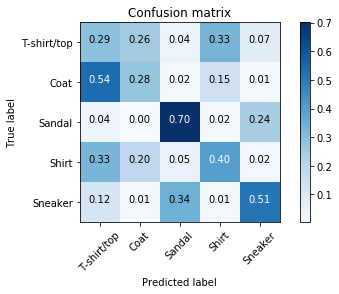

In [34]:
sh.compute_one_shot_accuracy(sh_best_model, max_acc_level = 3)
sh.plot_confusion_matrix(sh_best_model, normalize = True)